In [6]:
%matplotlib notebook 
import pandas
import matplotlib.pyplot as plt

flight_data = pandas.read_csv('airline-safety.csv')


# There are two different timelines within this data
# The first timeline is from 1985-1999 and the second timeline is from 2000-2014
# So the first thing im going to do is to split these two timelines into their own dataframe

flight_85_99 = flight_data.drop(['incidents_00_14', 'fatal_accidents_00_14', 'fatalities_00_14'], axis=1)

flight_00_14 = flight_data.drop(['incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99'], axis=1)

flight_incidents = flight_data.drop(['fatal_accidents_85_99', 'fatalities_85_99', 'fatal_accidents_00_14',
                                    'fatalities_00_14'], axis=1)
flight_fatal_accident = flight_data.drop(['incidents_85_99', 'incidents_00_14', 'fatalities_85_99', 'fatalities_00_14']
                                         , axis=1)
flight_fatalities = flight_data.drop(['fatal_accidents_85_99', 'fatal_accidents_00_14', 'incidents_85_99',
                                      'incidents_00_14'], axis=1)

# Next, I want to show the summary statistics of all the airlines for each timeline

print("For Airlines from 1985-1999\n")
for i in ['incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99']:
    names = i.split("_")
    attrib = ""
    for j in range(len(names)-1):
        if names[j].isalpha():
            attrib += " " + names[j]
    avg = flight_85_99[i].mean()
    print("The average number of" + attrib + " is: %.2f per year" % (avg/15))
    
print("\n")

print("For airlines from 2000-2014\n")
for i in ['incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14']:
    names = i.split("_")
    attrib = ""
    for j in range(len(names) - 1):
        if names[j].isalpha():
            attrib += " " + names[j]
    avg = flight_00_14[i].mean()
    print("The average number of" + attrib + " is: %.2f per year" % (avg / 15))


For Airlines from 1985-1999

The average number of incidents is: 0.48 per year
The average number of fatal accidents is: 0.15 per year
The average number of fatalities is: 7.49 per year


For airlines from 2000-2014

The average number of incidents is: 0.28 per year
The average number of fatal accidents is: 0.04 per year
The average number of fatalities is: 3.70 per year


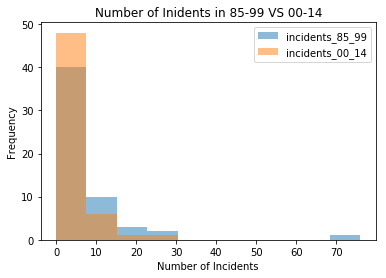

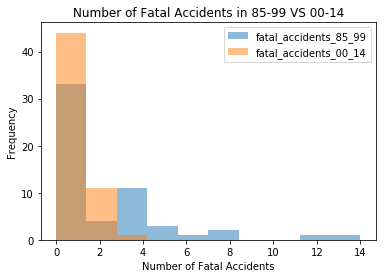

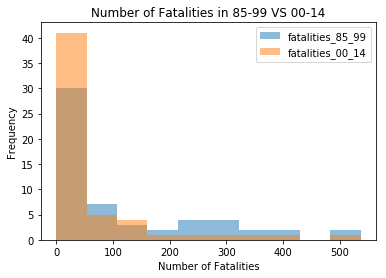

In [3]:
# The following histograms show the differnece between each category for each year group
# You can see that from the statistics from each category were higher in the earlier years
# and went down in the following age group

fig, ax = plt.subplots()
ax = flight_incidents[['incidents_85_99', 'incidents_00_14']].plot.hist(alpha=0.5, ax=ax)
ax.set_title("Number of Inidents in 85-99 VS 00-14")
ax.set_xlabel("Number of Incidents")
plt.show()

fig, ax = plt.subplots()
ax = flight_fatal_accident[['fatal_accidents_85_99', 'fatal_accidents_00_14']].plot.hist(alpha=0.5, ax=ax)
ax.set_title("Number of Fatal Accidents in 85-99 VS 00-14")
ax.set_xlabel("Number of Fatal Accidents")
plt.show()

fig, ax = plt.subplots()
ax = flight_fatalities[['fatalities_85_99', 'fatalities_00_14']].plot.hist(alpha=0.5, ax=ax)
ax.set_title("Number of Fatalities in 85-99 VS 00-14")
ax.set_xlabel("Number of Fatalities")
plt.show()

In [5]:
# This section shows the top three airlines in number of incidents from each year group and how they changed from
# the first year group to the second

print("Top 3 Airlines in number of Incidents 1985-1999:\n")
topthree = flight_85_99[flight_85_99['incidents_85_99'] < flight_85_99['incidents_85_99'].quantile(.06)].sort_values(by='incidents_85_99')
count = 1
values = []
for lines in topthree['incidents_85_99']:
    values.append(lines)
for lines in topthree['airline']:
    data = topthree['incidents_85_99']
    print(str(count) + ". %-20s" % lines.strip("*") + "   " + str(values[count-1]))
    count = count + 1
    
print("\n")

print("Top 3 Airlines in number of Incidents 2000-2014:\n")
topthree = flight_00_14[flight_00_14['incidents_00_14'] < flight_00_14['incidents_00_14'].quantile(.15)].sort_values(by='incidents_00_14')
count = 1
values = []
for lines in topthree['incidents_00_14']:
    values.append(lines)
for lines in topthree['airline']:
    if count == 4:
        break
    print(str(count) + ". %-20s" % lines.strip("*") + "    " + str(values[count-1]))
    count = count + 1


Top 3 Airlines in number of Incidents 1985-1999:

1. Cathay Pacific         0
2. Hawaiian Airlines      0
3. TAP - Air Portugal     0


Top 3 Airlines in number of Incidents 2000-2014:

1. Aer Lingus              0
2. Avianca                 0
3. Condor                  0


In [7]:
print("Bottom 3 Airlines in number of Incidents 1985-1999:\n")
bottomthree = flight_85_99[flight_85_99['incidents_85_99'] > flight_85_99['incidents_85_99'].quantile(.95)].sort_values(by='incidents_85_99',ascending=False)
count = 1
values = []
for lines in bottomthree['incidents_85_99']:
    values.append(lines)
for lines in bottomthree['airline']:
    data = bottomthree['incidents_85_99']
    print(str(count) + ". %-20s" % lines.strip("*") + "    " + str(values[count-1]))
    count = count+1

print("\n")
print("Bottom 3 Airlines in number of Incidents 2000-2014:\n")
bottomthree = flight_00_14[flight_00_14['incidents_00_14'] > flight_00_14['incidents_00_14'].quantile(.95)].sort_values(by='incidents_00_14', ascending=False)
count = 1
values = []
for lines in bottomthree['incidents_00_14']:
    values.append(lines)
for lines in bottomthree['airline']:
    print(str(count)+". %-20s" % lines.strip("*") + "   " + str(values[count-1]))
    count = count+1

print("\n")

Bottom 3 Airlines in number of Incidents:

1. Aeroflot                76
2. Ethiopian Airlines      25
3. Delta / Northwest       24


Bottom 3 Airlines in number of Incidents:

1. Delta / Northwest      24
2. American               17
3. United / Continental   14




In [9]:
print("Top 3 Airlines in number of Fatal Accidents 1985-1999:\n")
topthree = flight_85_99[flight_85_99['fatal_accidents_85_99'] < flight_85_99['fatal_accidents_85_99'].quantile(.30)].sort_values(by='fatal_accidents_85_99')
count = 1
values = []
for lines in topthree['fatal_accidents_85_99']:
    values.append(lines)
for lines in topthree['airline']:
    if count == 4:
        break
    print(str(count) + ". %-20s" % lines.strip("*") + "   " + str(values[count-1]))
    count = count + 1

print("\n")

print("Top 3 Airlines in number of Fatal Accidents 2000-2014:\n")
topthree = flight_00_14[flight_00_14['fatal_accidents_00_14'] < flight_00_14['fatal_accidents_00_14'].quantile(.60)].sort_values(by='fatal_accidents_00_14')
count = 1
values = []
for lines in topthree['fatal_accidents_00_14']:
    values.append(lines)
for lines in topthree['airline']:
    if count == 4:
        break
    print(str(count) + ". %-20s" % lines.strip("*") + "   " + str(values[count-1]))
    count = count + 1

Top 3 Airlines in number of Fatal Accidents 1985-1999:

1. Aer Lingus             0
2. Southwest Airlines     0
3. SAS                    0


Top 3 Airlines in number of Fatal Accidents 2000-2014:

1. Aer Lingus             0
2. Vietnam Airlines       0
3. TAP - Air Portugal     0


In [12]:
print("Bottom 3 Airlines in number of Fatal Accidents 1985-1999:\n")
bottomthree = flight_85_99[flight_85_99['fatal_accidents_85_99'] > flight_85_99['fatal_accidents_85_99'].quantile(.95)].sort_values(by='fatal_accidents_85_99', ascending=False)
count = 1
values = []
for lines in bottomthree['fatal_accidents_85_99']:
    values.append(lines)
for lines in bottomthree['airline']:
    print(str(count) + ". %-20s" % lines.strip("*") + "    " + str(values[count-1]))
    count = count + 1

print("\n")

print("Bottom 3 Airlines in number of Fatal Accidents 2000-2014:\n")
bottomthree = flight_00_14[flight_00_14['fatal_accidents_00_14'] > flight_00_14['fatal_accidents_00_14'].quantile(.60)].sort_values(by='fatal_accidents_00_14', ascending=False)
count = 1
values = []
for lines in bottomthree['fatal_accidents_00_14']:
    values.append(lines)
for lines in bottomthree['airline']:
    if count == 4:
        break
    print(str(count) + ". %-20s" % lines.strip("*") + "    " + str(values[count-1]))
    count = count + 1


Bottom 3 Airlines in number of Fatal Accidents 1985-1999:

1. Aeroflot                14
2. Delta / Northwest       12
3. United / Continental    8


Bottom 3 Airlines in number of Fatal Accidents 2000-2014:

1. American                3
2. Air France              2
3. Delta / Northwest       2


In [11]:
print("Top 3 Airlines in number of Fatalities 1985-1999:\n")
topthree = flight_85_99[flight_85_99['fatalities_85_99'] < flight_85_99['fatalities_85_99'].quantile(.30)].sort_values(by='fatalities_85_99')
count = 1
values = []
for lines in topthree['fatalities_85_99']:
    values.append(lines)
for lines in topthree['airline']:
    if count == 4:
        break
    print(str(count) + ". %-20s" % lines.strip("*") + "   " + str(values[count-1]))
    count = count + 1

print("\n")

print("Top 3 Airlines in number of Fatalities 2000-2014:\n")
topthree = flight_00_14[flight_00_14['fatalities_00_14'] < flight_00_14['fatalities_00_14'].quantile(.60)].sort_values(by='fatalities_00_14')
count = 1
values = []
for lines in topthree['fatalities_00_14']:
    values.append(lines)
for lines in topthree['airline']:
    if count == 4:
        break
    print(str(count) + ". %-20s" % lines.strip("*") + "   " + str(values[count-1]))
    count = count + 1

Top 3 Airlines in number of Fatalities 1985-1999:

1. Aer Lingus             0
2. Southwest Airlines     0
3. SAS                    0


Top 3 Airlines in number of Fatalities 2000-2014:

1. Aer Lingus             0
2. Vietnam Airlines       0
3. TAP - Air Portugal     0


In [13]:
print("Bottom 3 Airlines in number of Fatalities 2985-1999:\n")
bottomthree = flight_85_99[flight_85_99['fatalities_85_99'] > flight_85_99['fatalities_85_99'].quantile(.95)].sort_values(by='fatalities_85_99', ascending=False)
count = 1
values = []
for lines in bottomthree['fatalities_85_99']:
    values.append(lines)
for lines in bottomthree['airline']:
    print(str(count) + ". %-20s" % lines.strip("*") + "   " + str(values[count-1]))
    count = count + 1

print("\n")

print("Bottom 3 Airlines in number of Fatalities 2000-2014:\n")
bottomthree = flight_00_14[flight_00_14['fatalities_00_14'] > flight_00_14['fatalities_00_14'].quantile(.95)].sort_values(by='fatalities_00_14', ascending=False)
count = 1
values = []
for lines in bottomthree['fatalities_00_14']:
    values.append(lines)
for lines in bottomthree['airline']:
    print(str(count) + ". %-20s" % lines.strip("*") + "    " + str(values[count-1]))
    count = count + 1

Bottom 3 Airlines in number of Fatalities 2985-1999:

1. China Airlines         535
2. Japan Airlines         520
3. Korean Air             425


Bottom 3 Airlines in number of Fatalities 2000-2014:

1. Malaysia Airlines       537
2. American                416
3. Air France              337
